#merge two datasets.

In [35]:
import pandas as pd

df1 = pd.read_csv("calories.csv")

df2 = pd.read_csv("exercise.csv")

print(df1.head())
print(df2.head())

concat_data = pd.concat([df1, df2], ignore_index=True)
print(concat_data)

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
        User_ID  Calories  Gender   Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0     NaN   NaN     NaN     NaN       NaN         NaN   
1      14861698      66.0     NaN   NaN     NaN     NaN       NaN         NaN   
2      11179863      26.0     NaN   NaN     NaN     NaN       NaN         NaN   
3      16180408      71.0     NaN   NaN     NaN     NaN       NaN         NaN   
4      17771927    

#Using Pandas Merge()
Pandas provide a single function, merge(), as the entry point for all standard database join operations between DataFrame objects. There are four basic ways to handle the join (inner, left, right, and outer), depending on which rows must retain their data.

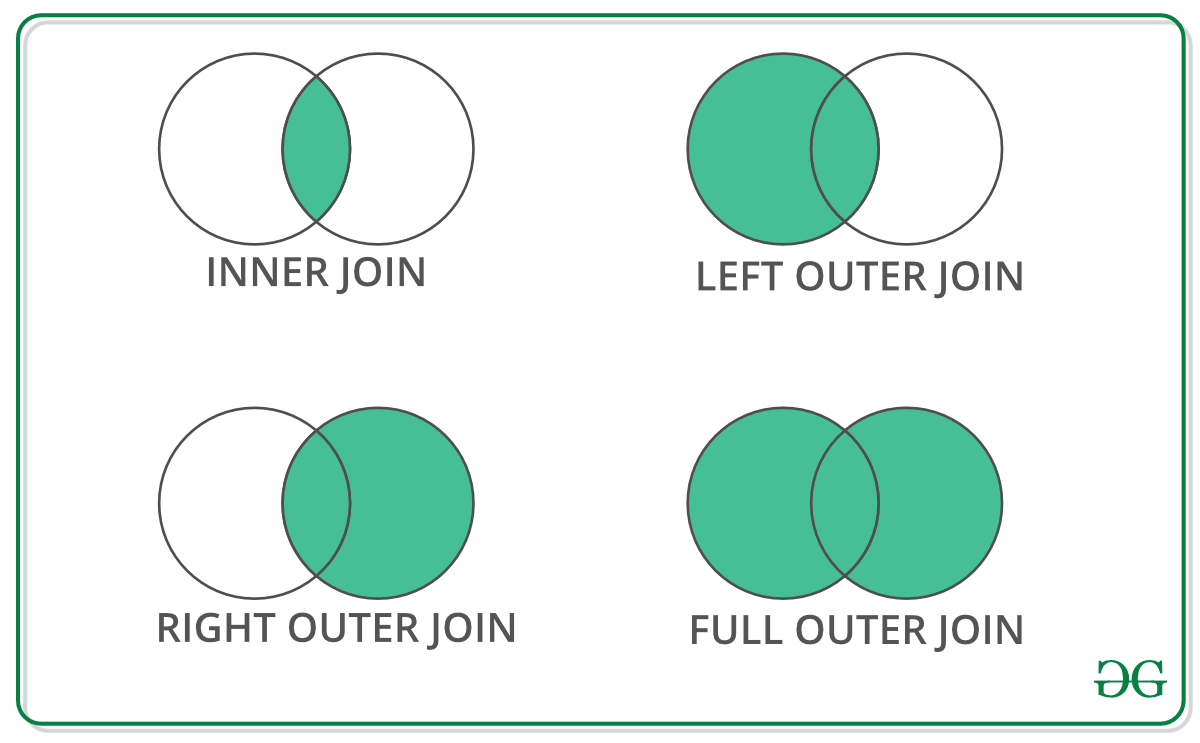

Similar to the concat() function is the merge() function where we can join datasets with the same columns. In the merge function, we can pass the datasets and use the Outer join mode to join the datasets with the same columns as shown

In [36]:
merge_data = pd.merge(df1, df2, how='outer')
print(merge_data)

        User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1      14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2      11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3      16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4      17771927      35.0  female   27   154.0    58.0      10.0        81.0   
...         ...       ...     ...  ...     ...     ...       ...         ...   
14995  15644082      45.0  female   20   193.0    86.0      11.0        92.0   
14996  17212577      23.0  female   27   165.0    65.0       6.0        85.0   
14997  17271188      75.0  female   43   159.0    58.0      16.0        90.0   
14998  18643037      11.0    male   78   193.0    97.0       2.0        84.0   
14999  11751526      98.0    male   63   173.0    79.0      18.0        92.0   

       Body_Temp  
0           40.8  
1

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


Now let’s load the dataset into the panda’s data frame and print its first five rows.

In [38]:
df = pd.read_csv('exercise.csv')
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Now let’s check the size of the dataset.

In [39]:
df.shape

(15000, 8)

Let’s check which column of the dataset contains which type of data.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


Now we will check the descriptive statistical measures of the data.

In [41]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


#Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.

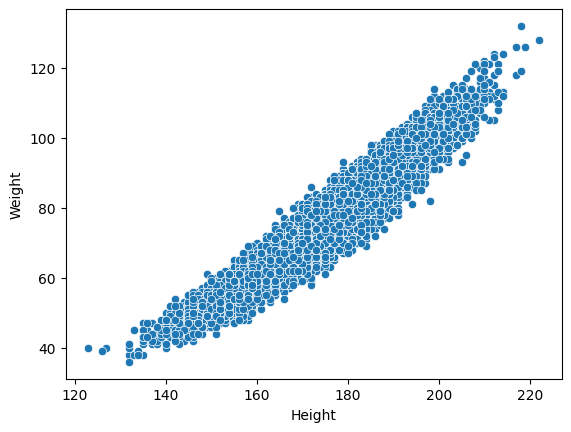

In [42]:
sb.scatterplot(x=df['Height'],y= df['Weight'])
plt.show()


So, we have a kind of linear relationship between these two features which is quite obvious.

In [43]:
# df = pd.read_csv('calories.csv')
# df.head()

In [44]:

# import pandas as pd
# import seaborn as sb
# import matplotlib.pyplot as plt

# df = pd.read_csv('calories.csv')

# features = ['User_ID', 'Calories', ]

# plt.subplots(figsize=(15, 10))
# for i, col in enumerate(features):
#     plt.subplot(2, 2, i + 1)
#     x = df.sample(1000)
#     sb.scatterplot(x=x[col],y= x['Calories'])
# plt.tight_layout()
# plt.show()

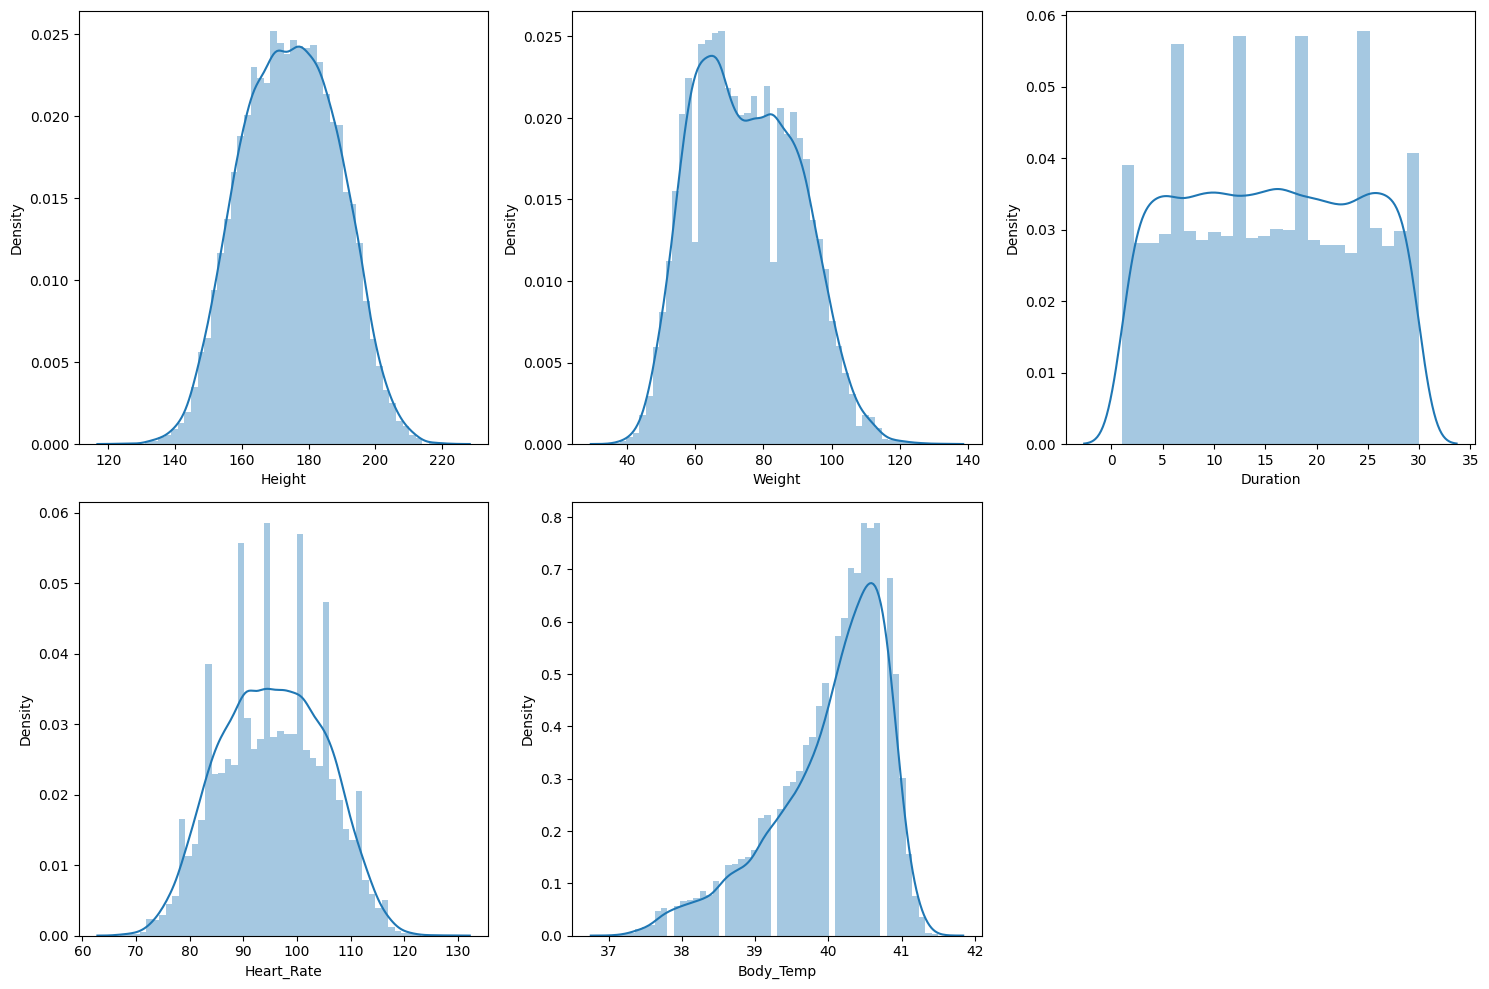

In [45]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()



The distribution of the continuous features follows close to normal distribution except for some features like Body_Temp and Calories.

In [46]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8


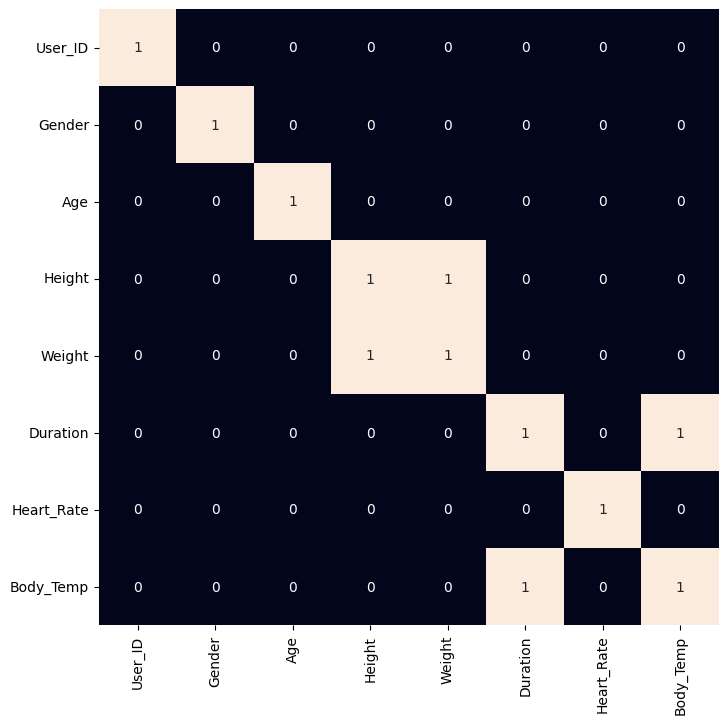

In [47]:
plt.figure(figsize=(8,8))
sb.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

Here we have a serious problem of data leakage as there is a feature that is highly correlated with the target column which is calories.

In [48]:
to_remove =['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

#Model Training
Now we will separate the features and target variables and split them into training and testing data by using which we will select the model which is performing best on the validation data.

In [57]:
features = df.drop(['Height'], axis=1) # 'Weight' has already been removed.
target = df['Height'].values # Target variable changed to 'Height'.

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 5), (1500, 5))

Now, let’s normalize the data to obtain stable and fast training.

In [59]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


Now let’s train some state-of-the-art machine learning models and compare them which fit better with our data.

In [60]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()



LinearRegression() : 
Training Error :  8.010303841091705
Validation Error :  2752131.2843821496

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  6.254953569200304
Validation Error :  10.978364542643229

Lasso() : 
Training Error :  8.055570840010645
Validation Error :  9.8588654

Out of all the above models, we have trained RandomForestRegressor and the XGB model’s performance is the same as their MAE for the validation data is same.